In [5]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: /Users/a1234/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
## 1 Chargement du Dataset

In [9]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Chargement des données
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Afficher les premières lignes
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
## 2. Nettoyage et prétraitement 
 ###Vérification des valeurs manquantes et typages :

In [15]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Vérifier les types des données
print(df.dtypes)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [16]:
## 3. Analyse exploratoire des données (EDA),
    ### Statistiques descriptives :

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
### Histogrammes pour chaque variable :

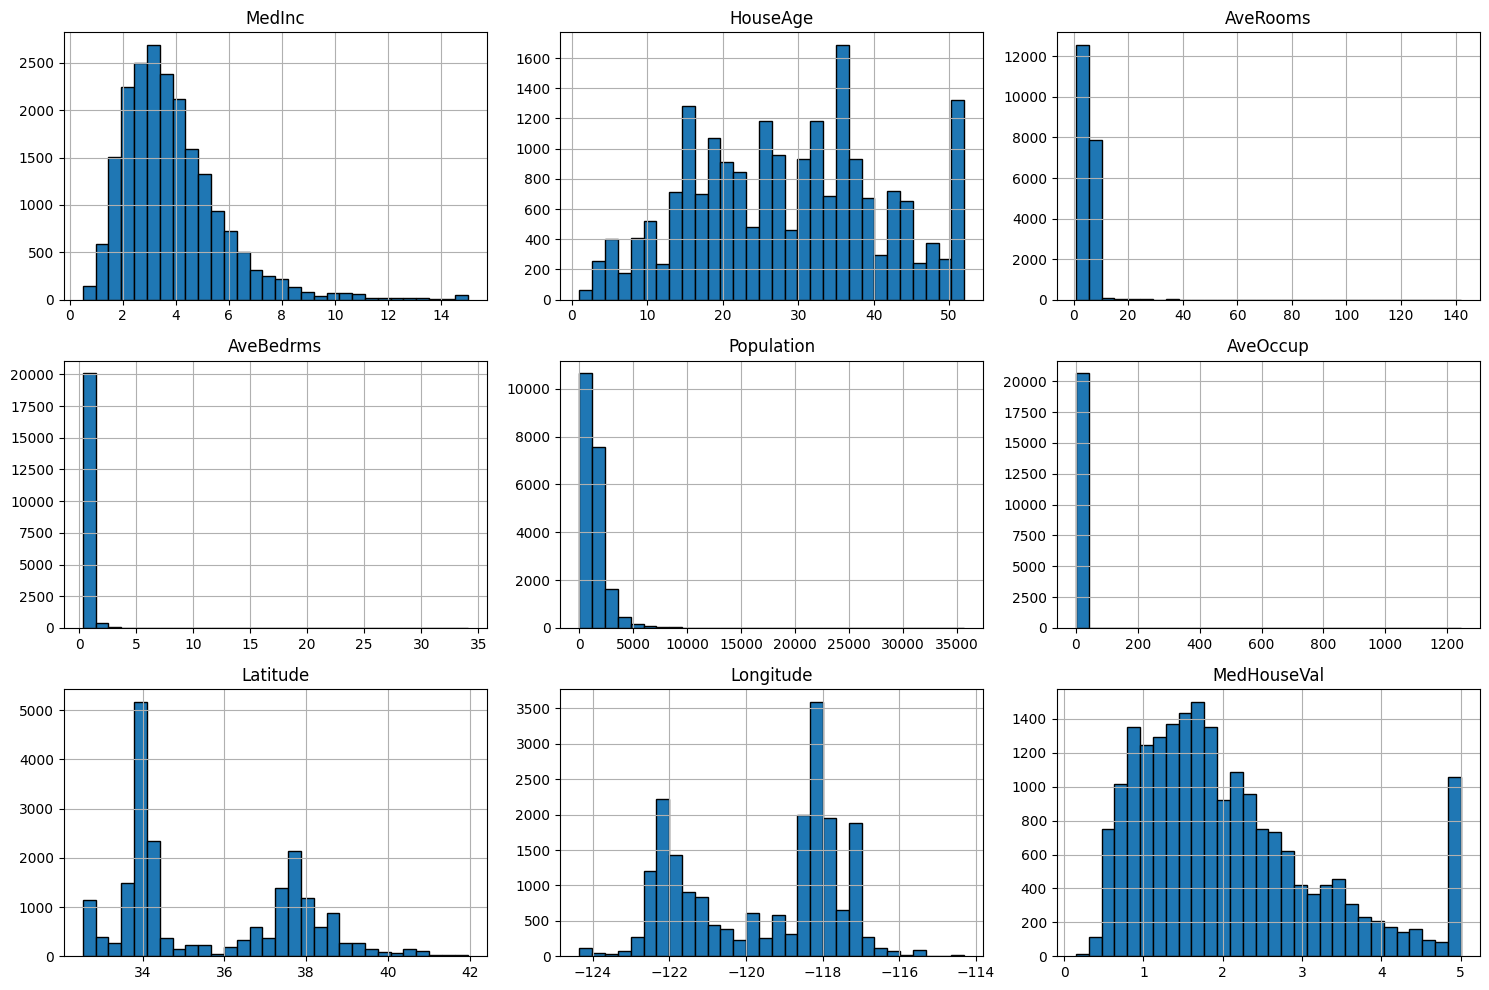

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15,10), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

In [22]:
### Boxplots (détéction des outliers) :

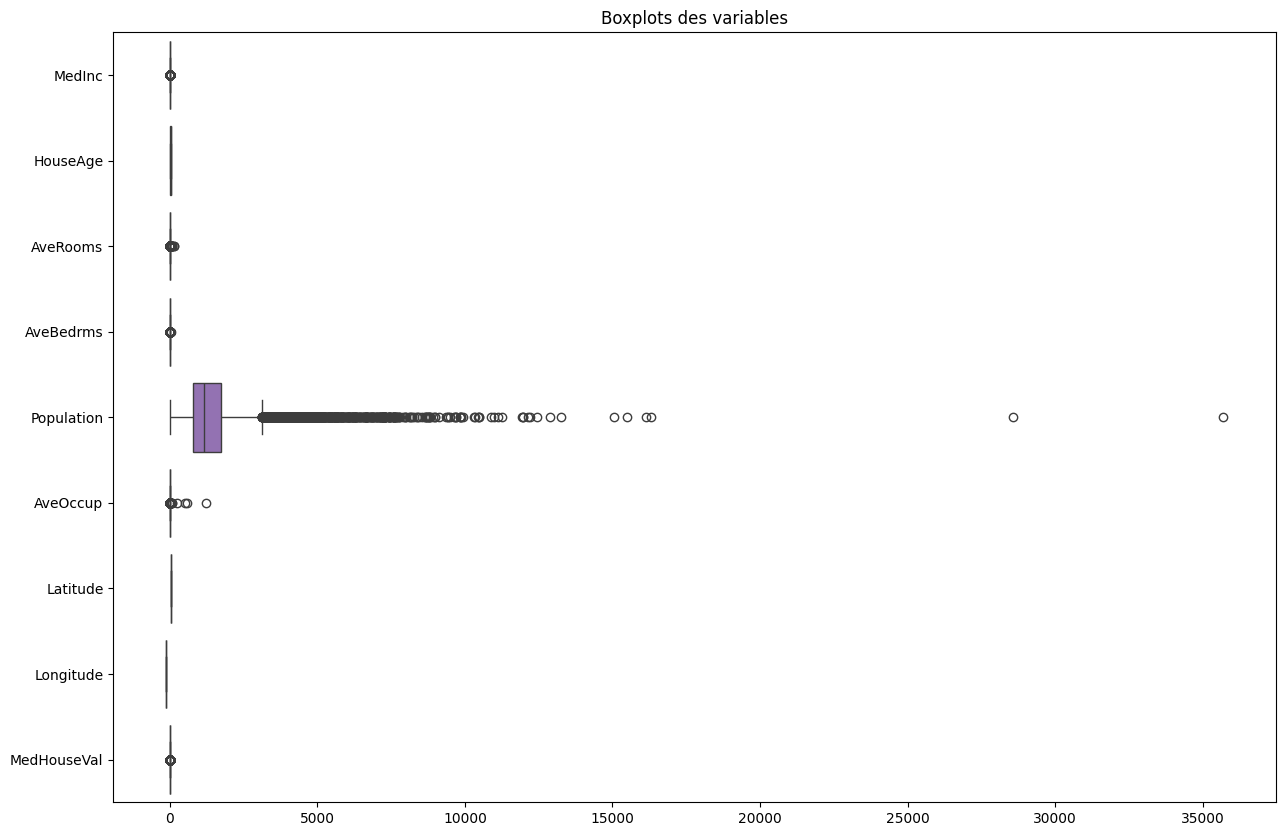

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots des variables")
plt.show()

In [24]:
### Scatter plots des variables clés vs prix médian :

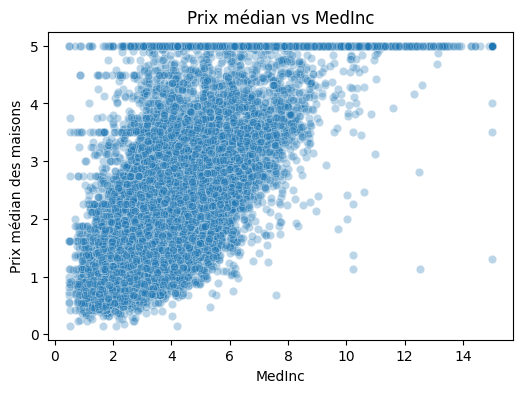

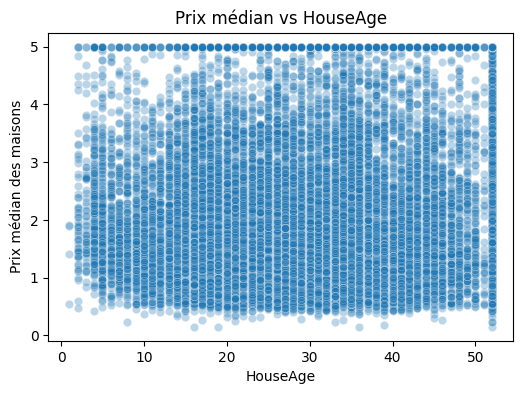

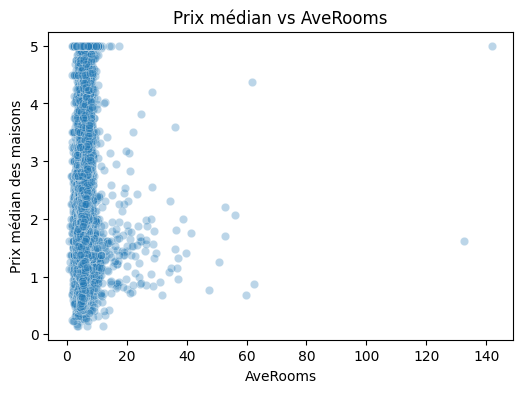

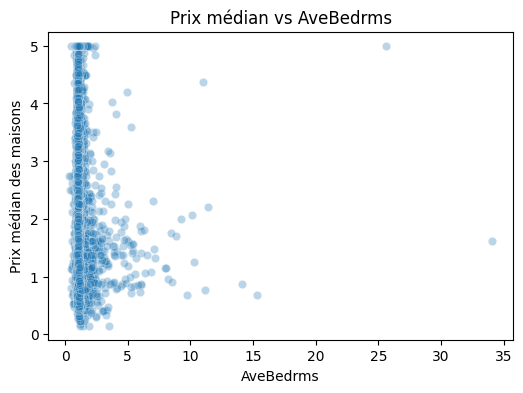

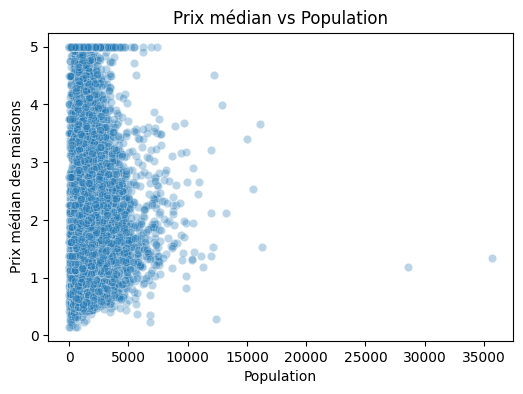

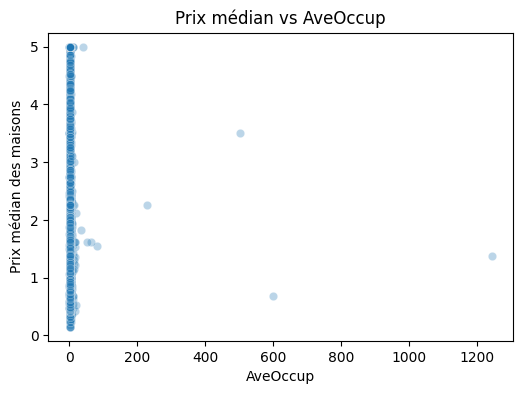

In [29]:
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df["MedHouseVal"], alpha=0.3)
    plt.title(f"Prix médian vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Prix médian des maisons")
    plt.show()

In [30]:
### Matrice de corrélation :

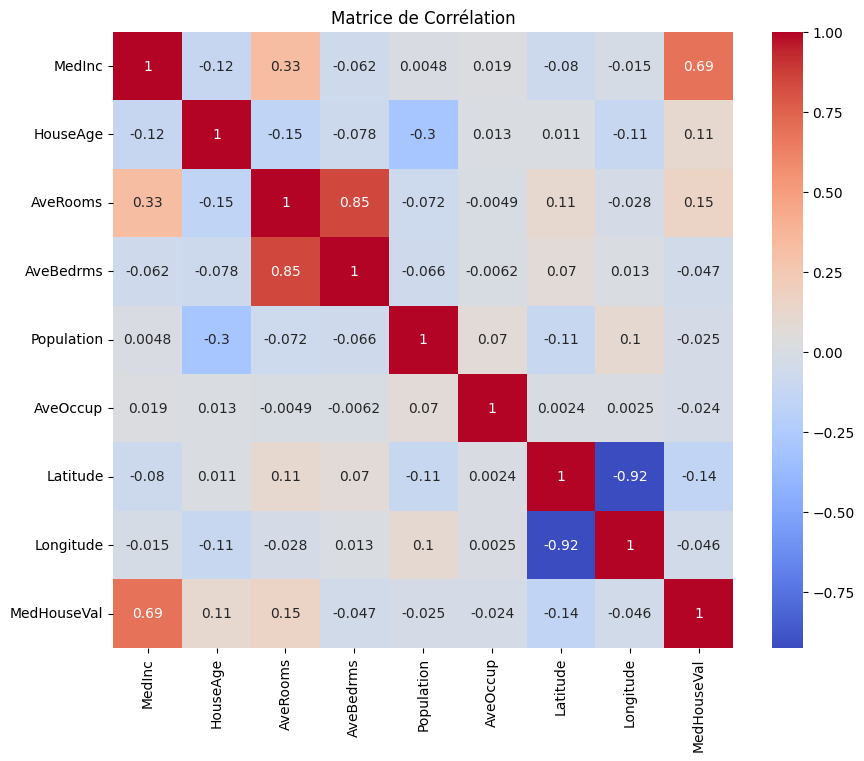

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

In [32]:
# 4. Split train/validation/test (60%-20%-20%)

In [34]:
from sklearn.model_selection import train_test_split

# Correction du nom de la colonne
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Séparation initiale : 60% train et 40% temporaire
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Séparation finale : 20% validation et 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (12384, 8)
Validation shape: (4128, 8)
Test shape: (4128, 8)


In [35]:
# 5. Feature Engineering et Sélection des Features
## Normalisation (StandardScaler):

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 6. Baseline et modélisation initiale : Régression linéaire

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modèle linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Prédiction sur validation
y_pred_val = lin_reg.predict(X_val_scaled)

# Évaluation
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Validation MSE:", mse_val)
print("Validation MAE:", mae_val)
print("Validation R²:", r2_val)

Validation MSE: 0.5325643962848101
Validation MAE: 0.5336164161743362
Validation R²: 0.5920099290350325


In [40]:
# 7. Régularisation : Ridge (L2) et Lasso (L1)

In [41]:
from sklearn.linear_model import Ridge, Lasso

# Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_val_scaled)

# Lasso (L1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_val_scaled)

# Évaluation Ridge
print("Ridge Validation R²:", r2_score(y_val, ridge_pred))

# Évaluation Lasso
print("Lasso Validation R²:", r2_score(y_val, lasso_pred))

Ridge Validation R²: 0.5920182746597593
Lasso Validation R²: 0.5895359845632149


In [42]:
# 8. Évaluation finale du meilleur modèle sur le test set
##Supposons que Ridge est meilleur d'après les résultats de validation :

In [43]:
import numpy as np

# Évaluation finale avec Ridge
y_pred_test = ridge.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test MAE:", mae_test)
print("Test R²:", r2_test)

# Intervalle de confiance à 95% pour les prédictions
conf_interval = 1.96 * np.std(y_pred_test - y_test) / np.sqrt(len(y_test))
print("Intervalle confiance à 95%:", conf_interval)

Test MSE: 0.5545733931004742
Test MAE: 0.5337479409939057
Test R²: 0.5955342565680282
Intervalle confiance à 95%: 0.022716681772413618


In [44]:
# 9. Conclusions et interprétation
## Importance des variables :

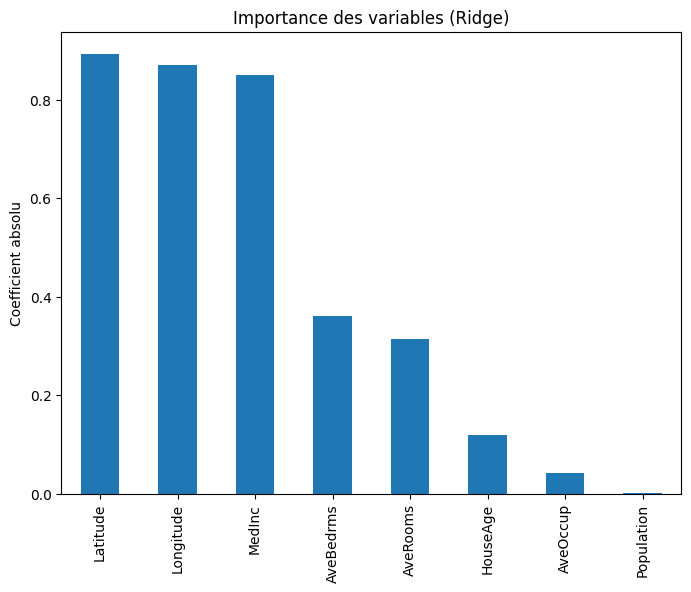

In [45]:
importance = pd.Series(abs(ridge.coef_), index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.title("Importance des variables (Ridge)")
plt.ylabel("Coefficient absolu")
plt.show()